# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head(3)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89


In [3]:
df.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [4]:
# Retirando variáveis que não fazem sentido para o modelo

df.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1, inplace=True)
df.dropna(subset=['tempo_emprego'], axis=0, inplace=True)
print(df.columns)

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
      dtype='object')


1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

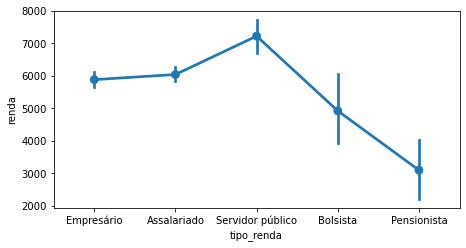

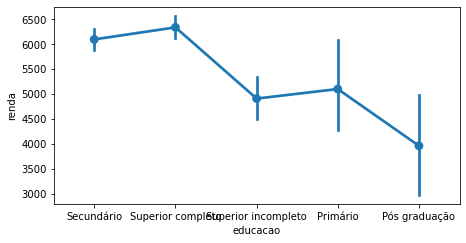

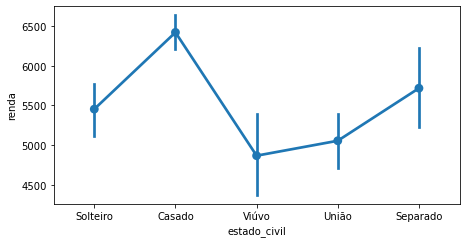

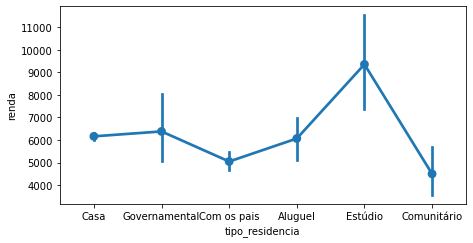

In [27]:
# Verificando frequência das respostas das variáveis categóricas.

features = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for i in range(0, len(features)):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2, i+1)
    sns.pointplot(y = 'renda', x = features[i], data = df)

# Primeiro modelo

In [25]:
# Criando primeiro modelo

model = "np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda, Treatment('Servidor público')) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia"

y, X = patsy.dmatrices(model, data=df)
X

DesignMatrix with shape (12427, 25)
  Columns:
    ['Intercept',
     'C(sexo)[T.M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     "C(tipo_renda, Treatment('Servidor público'))[T.Assalariado]",
     "C(tipo_renda, Treatment('Servidor público'))[T.Bolsista]",
     "C(tipo_renda, Treatment('Servidor público'))[T.Empresário]",
     "C(tipo_renda, Treatment('Servidor público'))[T.Pensionista]",
     'C(educacao)[T.Pós graduação]',
     'C(educacao)[T.Secundário]',
     'C(educacao)[T.Superior completo]',
     'C(educacao)[T.Superior incompleto]',
     'C(estado_civil)[T.Separado]',
     'C(estado_civil)[T.Solteiro]',
     'C(estado_civil)[T.União]',
     'C(estado_civil)[T.Viúvo]',
     'C(tipo_residencia)[T.Casa]',
     'C(tipo_residencia)[T.Com os pais]',
     'C(tipo_residencia)[T.Comunitário]',
     'C(tipo_residencia)[T.Estúdio]',
     'C(tipo_residencia)[T.Governamental]',
     'qtd_filhos',
     'idade',
     'tempo_emprego',
     'qt_pessoas_residencia']
  

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:29:27   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

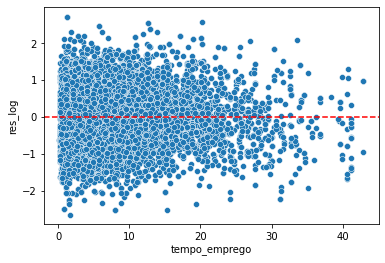

In [26]:
reg = sm.OLS(y, X).fit()

df['res_log'] = reg.resid

print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'res_log', data = df)
plt.axhline(y=0, color='r', linestyle='--')

<h2>Realizando o teste com o pointplot detectei que a variável "tipo_renda" tem a opção "Servidor público" aparecendo com mais frequência, então a coloquei como casela de referência, contudo, essa ação não parece fazer sentido prático para a análise.</h2>

# Segundo modelo

In [45]:
model = 'np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + idade + tempo_emprego'

y, X = patsy.dmatrices(model, data=df)
X

DesignMatrix with shape (12427, 6)
  Columns:
    ['Intercept',
     'C(sexo)[T.M]',
     'posse_de_veiculo[T.True]',
     'posse_de_imovel[T.True]',
     'idade',
     'tempo_emprego']
  Terms:
    'Intercept' (column 0)
    'C(sexo)' (column 1)
    'posse_de_veiculo' (column 2)
    'posse_de_imovel' (column 3)
    'idade' (column 4)
    'tempo_emprego' (column 5)
  (to view full data, use np.asarray(this_obj))

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1315.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:27:24   Log-Likelihood:                -13676.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12421   BIC:                         2.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

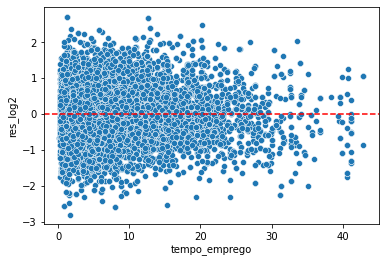

In [46]:
reg = sm.OLS(y, X).fit()

df['res_log2'] = reg.resid

print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = 'res_log2', data = df)
plt.axhline(y=0, color='r', linestyle='--')

<h2>O modelo inicial parece desnecessariamente complexo e com muitas variáveis com pouca significância estatística. Nesse sentido, o modelo final é mais simples, só possui variáveis significantes, porém com um R² um pouco abaixo em comparação ao primeiro modelo. No entanto, apesar do R² mais baixo, o último modelo parece mais próximo do esperado.</h2>